<a href="https://colab.research.google.com/github/WegenenVerkeer/OTLMOW/blob/main/BIM4Infra24/OTLMOW_demo_BIM4Infra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installatie in een Python omgeving
Gebruik het pip command om de library te installeren. Dat kan lokaal, maar ook in een notebook zoals hier.

De onderstaande import statements doe je één keer. *Opgelet: de all_classes importeert alle OTL classes en kan best worden vermeden door classes expliciet te importeren. Dit wordt wel in deze demo gebruikt zodat er minder import statements zijn.*

In [ ]:
! pip install otlmow-model
from otlmow_model.OtlmowModel.Helpers.all_functions import *
from otlmow_model.OtlmowModel.Helpers.all_classes import * # enkel voor demo's!

import logging # set logging
logging.getLogger().setLevel(logging.INFO)

# Basis concepten
## Het eerste OTL object aanmaken
Importeer de juiste klasse en instantieer deze met ronde haken. Daarna kan je de attributen aanpassen en het object "printen" om te zien wat er in zit.


In [ ]:
shrubbery = SolitaireHeester()
shrubbery.notitie = 'Wanted by the knights who say "Ni!"'

print(shrubbery)

Je kan ook gebruik maken van het dynamisch aanmaken van objecten op basis van de URI of van de naam en de namespace. Dit doe je door
 `dynamic_create_instance_from_uri` of `dynamic_create_instance_from_ns_and_name` te gebruiken. Dit heeft als voordeel dat je meer flexibiliteit hebt in je scripts.

In [ ]:
another_shrubbery = dynamic_create_instance_from_uri('https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester')

print(another_shrubbery)

In [ ]:
another_shrubbery = dynamic_create_instance_from_ns_and_name(namespace='onderdeel', class_name='SolitaireHeester')

print(another_shrubbery)

`from otlmow_model.OtlmowModel.Classes.Onderdeel.SolitaireHeester import SolitaireHeester`

Het voordeel van de **expliciete** import voor een applicatie is snelheid. Een voordeel voor een ontwikkelaar is dat je broncode gemakkelijk kan bekijken.

## Attributen
Je kan nu attributen gebruiken, net zoals in andere code. Er is zelfs een auto-complete. IDE's zoals PyCharm kunnen nog veel meer tonen.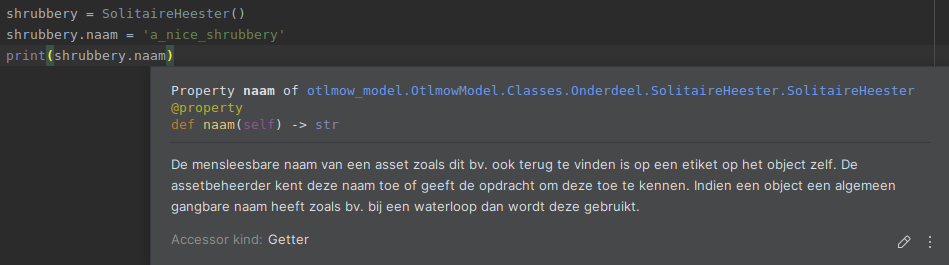

In [ ]:
shrubbery.toestand = 'in-gebruik'
shrubbery.naam = 'a_nice_shrubbery'
shrubbery.assetId.identificator = 'shrubbery_1'
shrubbery.soortnaam.soortnaamNederlands = 'heester'

print(f'De naam van de shrubbery is: {shrubbery.naam}')

In [ ]:
print(shrubbery)

## Validatie op de attributen
De meerwaarde van deze OTL implementatie is natuurlijk dat er validatie is bij het invullen en bevragen. Zo krijg je een foutmelding bij het ingeven van een foute keuzelijstwaarde.

In [ ]:
shrubbery.toestand = 'foute_waarde'

Je kan gebruik maken van de meta_info functie om het attribuut te bevragen. Voor keuzelijsten krijg je dan een oplijsting van de mogelijke waardes.

In [ ]:
print(meta_info(shrubbery, attribute='toestand'))

Je kan op die manier ook de klasse zelf bevragen en zo ook de attributen zien en hun type.

In [ ]:
print(meta_info(shrubbery))

In [ ]:
print(meta_info(shrubbery, attribute='soortnaam'))

Wanneer de gebruiker een verkeerde waarde ingeeft, zal er eerst geprobeerd worden om deze alsnog te converteren naar correcte waarde. Bijvoorbeeld wanneer men een boolean (True/False) als een tekst invult, wordt die waarde wel aanvaard. Dit geeft wel een waarschuwing.

In [ ]:
shrubbery.isActief = 'True'

## Geometrie
Het Geometrie Artefact is mee geïmplementeerd. Dat wil zeggen dat je, waar van toepassing, het attribuut "geometry" kan invullen met een WKT string en dat deze op de mogelijke types volgens het GA wordt gevalideerd.

In [ ]:
shrubbery.geometry = 'LINESTRING Z (200000 200000 0, 200000 200001 0)'

Op aangeven van de foutmelding, wordt er nu een geometrie van het juiste type ingevuld, die geen fout oplevert.

In [ ]:
shrubbery.geometry = 'POINT Z (200000 200000 0)'

## Validatie op relaties
Naast assets kan je ook relaties tussen assets valideren. Via *is_valid_relation(...)* kan je checken of een relatie mogelijk is tussen twee assets.

In [ ]:
ground = Grond()
print(f'relatie LigtOp: {is_valid_relation(source=shrubbery, target=ground, relation_type=LigtOp)}')
print(f'relatie Bevestiging: {is_valid_relation(source=ground, target=shrubbery, relation_type=Bevestiging)}')

Bovendien kan je met *create_relation(...)* de relatie meteen aanmaken. Om die relatie aan te maken hebben zowel de bron als het doel een identificator nodig, die dan ook in de identificator van de relatie wordt overgenomen.

In [ ]:
ground.assetId.identificator = 'the_ground'
ligt_op = create_relation(source=shrubbery, target=ground, relation_type=LigtOp)
print(ligt_op)

## Python dictionaries
Een dictionary in Python is heel efficiënte datastructuur. Daarom is er een gemakkelijke omzetting voorzien van de Python OTL objecten naar dictionaries en omgekeerd.

In [ ]:
shrubbery_dict = shrubbery.to_dict()
import json
print(json.dumps(shrubbery_dict, indent=4))

En ook omgekeerd...

In [ ]:
shrubbery_dict = {
    'toestand': 'in-gebruik',
    'isActief': True,
    'assetId': {'identificator': 'another_shrubbery'},
    'notitie': 'Also wanted by the knights who say "Ni!"',
    'naam': 'another_shrubbery',
    'typeURI': 'https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester'
}
another_shrubbery = OTLObject.from_dict(shrubbery_dict)
print(another_shrubbery)

## Meer
Er zijn nog meer features beschikbaar zoals het vergelijken van assets, kopiëren van attributen etcetera. Een laatste handige feature voor wie met Linked Data wil werken is de omzetting naar een RDF dictionary:

In [ ]:
another_shrubbery_rdf = another_shrubbery.to_dict(rdf=True)
import json
print(json.dumps(another_shrubbery_rdf, indent=4))

# Hoe worden deze classes opgebouwd?
De classes worden gegenereerd vanuit een andere OTLMOW package, ModelBuilder. Deze kan gebruikt worden om vertrekkende van een OTL SQLite of een subset een model op te bouwen. Optioneel wordt ook het Geometrie Artefact opgegeven.

In [ ]:
! pip install otlmow-modelbuilder

Download de laatste versie van de OTL en het Geometrie Artefact

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://wegenenverkeer.data.vlaanderen.be/doc/implementatiemodel/master/html/OTL.db', 'OTL.db')
urllib.request.urlretrieve('https://wegenenverkeer.data.vlaanderen.be/doc/implementatiemodel/master/html/Geometrie_Artefact.db', 'GA.db')

Bouw het model in de map "demo_model" (ongeveer 40 seconden)

In [ ]:
from otlmow_modelbuilder.ModelBuilder import ModelBuilder
from pathlib import Path

current_dir = Path('.').parent
otl_subset_path = Path(current_dir / 'OTL.db')
GA_path = Path(current_dir / 'GA.db')
model_directory = Path(current_dir / 'demo_model')

ModelBuilder.build_otl_datamodel(otl_subset_location=otl_subset_path,
                                 geometry_artefact_location=GA_path,
                                 directory=model_directory, environment='prd')

Ter info: dit script wordt elke nacht op GitHub uitgevoerd. Elke ochtend staat er dus mogelijk een nieuwere versie van het model klaar, wanneer er een update is van de OTL of het Geometrie Artefact, of wanneer er iets verandert in de keuzelijsten.

# Converter

In [ ]:
! pip install otlmow-converter

Tot nu toe hadden we de aangemaakte objecten alleen in het geheugen. Hun nut is beperkt. Daarom is er de converter module die omzettingen toelaten naar allerlei formaten en structuren:
- een bestand (conform de richtlijnen voor het DAVIE platform)
- een dataframe
- een dotnotation_dict



Onderstaande code maakt 100 assets van het type Metselwerk aan in een for-loop. Vervolgens exporteer je deze naar een Excel bestand met één lijn code.

In [ ]:
from otlmow_converter.OtlmowConverter import OtlmowConverter
muren = []
for index in range(100):
    muur = Metselwerk()
    muur.assetId.identificator = f'muur_{index}'
    muur.notitie = 'Romani ite domum'
    muren.append(muur)

OtlmowConverter.to_file(muren, file_path=Path('muren.xlsx'))

Je kan de objecten ook omzetten naar een pandas Dataframe. Onderstaande code laadt eerst de interactieve component in voor dataframes in Google Colab en daarna worden dezelfde 100 objecten omgezet naar een Dataframe en getoond.

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
df_muren = OtlmowConverter.to_dataframe(muren)
df_muren

Maar: de conversies zijn steeds mogelijk in twee richtingen!!
Je kan dus ook bestanden inladen.

Met andere woorden: conversie tussen alles mogelijk!

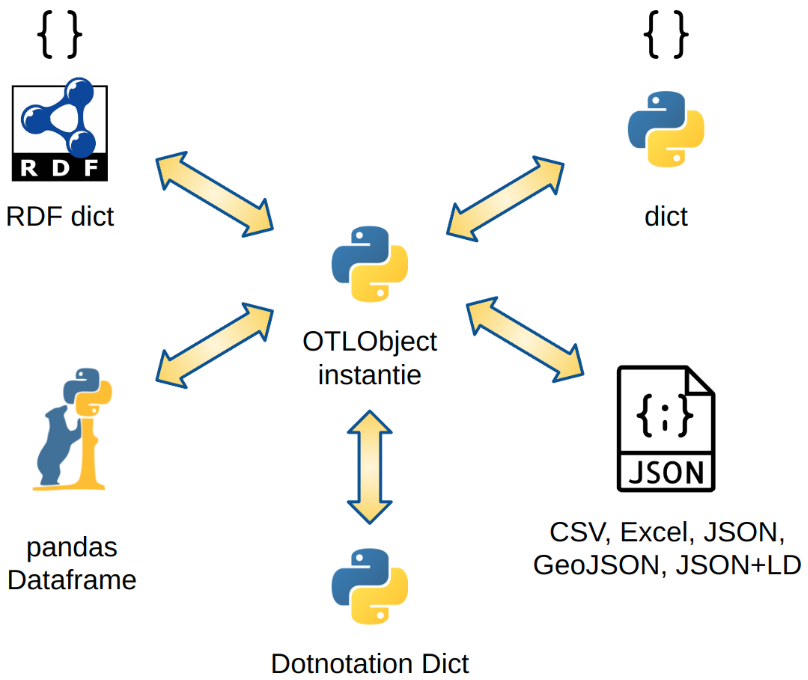

In [ ]:
OtlmowConverter.to_file(df_muren, file_path=Path('muren.json'))

# Visualiseren
Met de otlmow-Visuals library kan je gemakkelijk de OTL objecten visualiseren in een relatiediagram.

In [ ]:
! pip install otlmow-visuals

In [ ]:
from otlmow_visuals.PyVisWrapper import PyVisWrapper
from IPython.display import HTML
from pathlib import Path

PyVisWrapper().show([shrubbery, ligt_op, ground],
                    html_path = Path('example.html'), notebook_mode=True)

HTML(filename="example.html")

# DAVIE client
Zie OTLMOW-DAVIE/Demo